### **Dataset 1**

In [41]:
# import require libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

# read General1 dataset
df = pd.read_csv('/content/drive/MyDrive/Time_Series-Hassan/General/Data1.csv', parse_dates=True)
df.head()

,DATE,YEAR,EURO
0,01/01/2019,2019,8350
1,01/01/2019,2019,104
2,03/01/2019,2019,3666
3,03/01/2019,2019,1242
4,06/01/2019,2019,284


In [3]:
# import require libraries
import pandas as pd 
import numpy as np


# read General1 dataset
df = pd.read_csv('/content/drive/MyDrive/Time_Series-Hassan/General/Data1.csv', parse_dates=True)
df.index.freq = 'MS'
df.head(20)

,DATE,YEAR,EURO
2846,18/11/2021,2021,29
2847,22/11/2021,2021,600
2848,23/11/2021,2021,3735
2849,24/11/2021,2021,15
2850,29/11/2021,2021,10


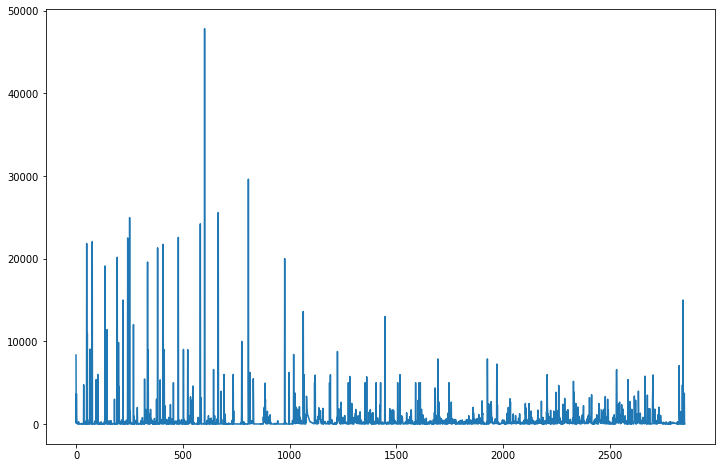

In [68]:
df['EURO'].plot(figsize=(12,8))

In [69]:
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,YEAR,EURO
0,2019-01-01,2019,8350
1,2019-01-01,2019,104
2,2019-03-01,2019,3666
3,2019-03-01,2019,1242
4,2019-06-01,2019,284
...,...,...,...
2846,2021-11-18,2021,29
2847,2021-11-22,2021,600
2848,2021-11-23,2021,3735
2849,2021-11-24,2021,15


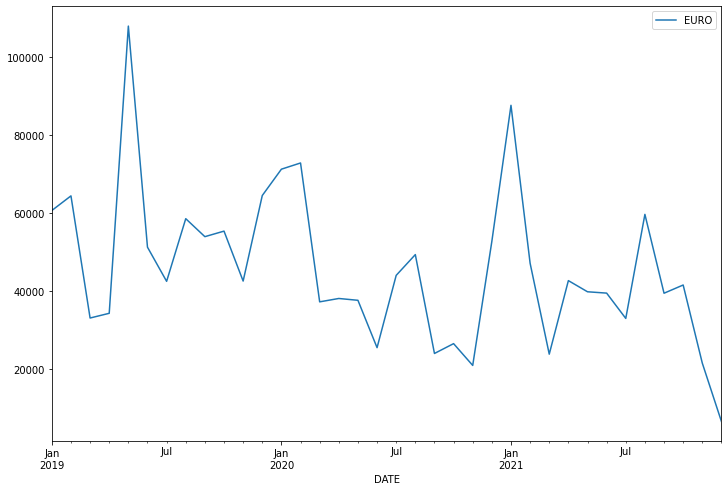

In [70]:
df_month = df.groupby(pd.Grouper(key='DATE', freq='1M')).sum() # groupby each 1 month
df_month.drop(['YEAR'], axis=1, inplace=True)

df_month.plot(figsize=(12,8))

In [73]:
df_month['EURO_LastYear_MONTH']=df_month['EURO'].shift(+12)
df_month

,EURO,EURO_LastYear_MONTH
DATE,,
2019-01-31,60654,NaN
2019-02-28,64397,NaN
2019-03-31,33131,NaN
2019-04-30,34339,NaN
2019-05-31,107863,NaN
2019-06-30,51264,NaN
2019-07-31,42522,NaN
2019-08-31,58560,NaN
2019-09-30,53956,NaN


In [91]:
df_month = df_month.dropna()

In [92]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [101]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=2, random_state=1)

In [102]:
x1,x2,y=df_month['EURO'],df_month['EURO_LastYear_MONTH'],df_month['EURO']
x1,x2,y=np.array(x1),np.array(x2),np.array(y)
x1,x2,y=x1.reshape(-1,1),x2.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2),axis=1)
print(final_x)

[[ 71232.  60654.]
 [ 72820.  64397.]
 [ 37270.  33131.]
 [ 38133.  34339.]
 [ 37666. 107863.]
 [ 25541.  51264.]
 [ 44050.  42522.]
 [ 49364.  58560.]
 [ 24054.  53956.]
 [ 26573.  55375.]
 [ 20993.  42591.]
 [ 52749.  64486.]
 [ 87582.  71232.]
 [ 47151.  72820.]
 [ 23877.  37270.]
 [ 42705.  38133.]
 [ 39849.  37666.]
 [ 39506.  25541.]
 [ 33027.  44050.]
 [ 59663.  49364.]
 [ 39478.  24054.]
 [ 41582.  26573.]
 [ 21586.  20993.]
 [  6657.  52749.]]


In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_x,y,test_size=0.2)

In [104]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


LinearRegression()

In [115]:
test1

array([[71232.],
       [60654.]])

In [119]:
test1 = 60654
test2 = 71232
test1,test2 = np.array(test1),np.array(test2)
test1,test2=test1.reshape(-1,1),test2.reshape(-1,1)
final_test=np.concatenate((test1,test2),axis=1)

model.predict(final_test)

array([61608.71])

In [ ]:
# future values of 
for i in


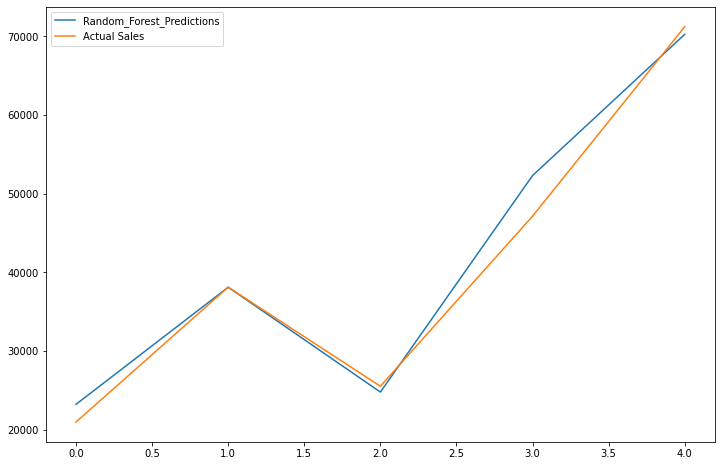

In [106]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

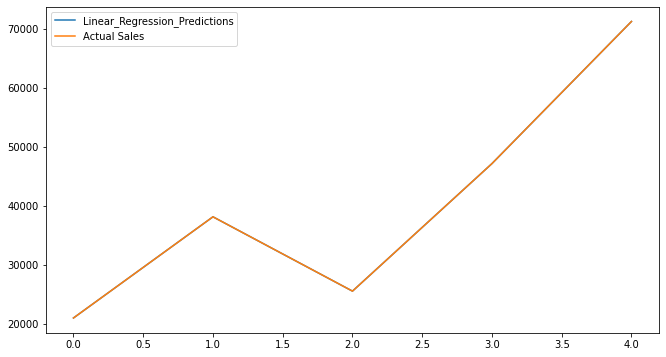

In [107]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [108]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [109]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 2576.425373927994
Mean Squared Error for Linear Regression Model is: 3.9852061127397324e-12


In [ ]:
# function to create and save machine learning models
# for each month 

def 